<a href="https://colab.research.google.com/github/justinwickelgren/data-science-class/blob/main/JustWickU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

In [2]:
# import required libraries
import preliz as pz # for plot of prior
import pymc as pm # for model
import arviz as az # for plot of posterior
import numpy as np # for data array

# Presidential Popular Vote
This project will attempt to predict the winner of the 2024 Presidential popular vote. It will not consider the electoral college (and whenever I say "win" or "loss" for an election I mean popular vote). This is interesting because, in my opnion, the popular vote is a more accurate representation of who the country wants as president than the electoral college, even though it doesn't actually decide the election. The prior will be based on my own opinion about this particular election, and the data will be the 10 most recent presidential election results.

### Prior and Assumptions
I will make assumptions about this election to determine the prior. First, I think that Democrats are more likely to win the popular vote than the electoral college, so I will give Kamala Harris a higher chance than I would for winning the election. Second, I think that the election will be quite close because the country is very polarized. Third, I think Harris is at a disadvantage because she has to defend Joe Biden's relatively unpopular term and entered the race late. Fourth, the election is still two months away and Harris' late entry increases uncertainty, so my prior will be relatively uncertain. Therefore, I will give Harris a 67% chance to win as the prior.

<Axes: >

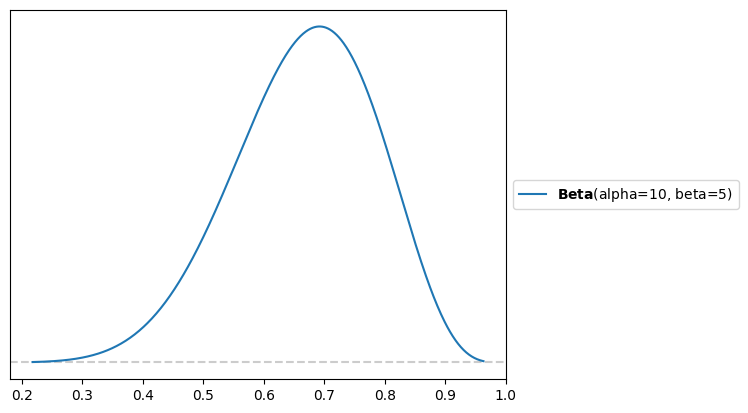

In [3]:
# Beta distribution for model with alpha and beta values set to achieve around 62% mean/median and relatively high uncertainty
prior = pz.Beta(alpha=10,beta=5)
prior.plot_pdf()

In [4]:
# print mean and median
prior.mean(), prior.median()

(0.6666666666666666, 0.6742488447338502)

Above is a visualization of the Beta distribution that will be the prior. It has a mean and median around 67%, and it is uncertain wide, so it is a fairly good representation of my assumptions for the prior.

### Data
The data we will use is the last 10 presidential elections. While more data would be nice, the farther into the past the data is, the less relevant it is to our current political environment, so I have chosen to stop in 1984. A 0 will represent a Republican win, and a 1 will represent a Democratic win. Here are the 10 elections that will form the data:

1 (2020) <br>
1 (2016) <br>
1 (2012) <br>
1 (2008) <br>
0 (2004) <br>
1 (2000) <br>
1 (1996) <br>
1 (1992) <br>
0 (1988) <br>
0 (1984)

These can then be put into a Numpy array for the model to use.

In [5]:
data = np.array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0]) # numpy array for data

### Posterior
To form our posterior, I will remake the Beta distribution prior with pymc (instead of preliz). Then, we will update it with our likelihood, in the form of a Bernoulli distribution and sample 1000 data points from our posterior.

In [6]:
with pm.Model() as model:
  θ = pm.Beta('θ' , alpha = 8. , beta = 5.) # create beta distribution for prior
  y =  pm.Bernoulli('y', p=θ, observed=data) # create Bernoulli distribution for likelihood
  sample = pm.sample(1000) # sample 1000 data points from posterior

<Axes: title={'center': 'θ'}>

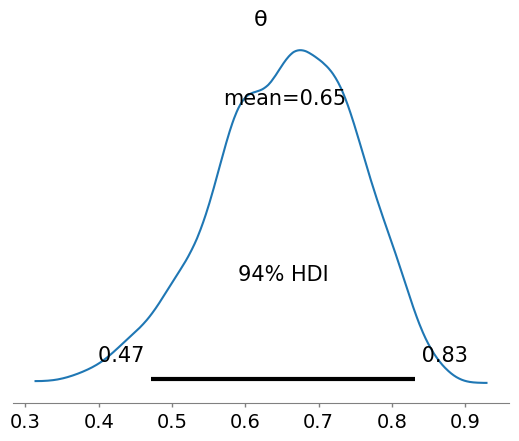

In [7]:
az.plot_posterior(sample) # graph posterior

Looking at the above plot of the posterior, we can see that the mean has decreased slightly, so our posterior has a better chance for Trump than our prior did. I expected a relatively small change because the data is quite similar to the prior. While the change is small, the decrease is not surprising since I think that Harris has a slightly better chance than the average Democrat in the past 40 years.

We will now use our model to predict a series of outcomes:

In [8]:
pm.sample_posterior_predictive(sample, model=model, extend_inferencedata=True) # sample from posterior
stacked_model = az.extract(sample, group="posterior_predictive") # stack the models
stacked_model.sel(sample=0).sel(draw=0).y.to_series().values # output 10 simulated results

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

Thus, the model predicts that Harris will win the popular vote 6 out of 10 times.